<a href="https://colab.research.google.com/github/koborishun/shun-finance/blob/develop/%E3%83%AD%E3%83%BC%E3%82%BD%E3%82%AF%E8%B6%B3%2C%E5%87%BA%E6%9D%A5%E9%AB%98%2CMACD%E6%8F%8F%E7%94%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install
!pip install Ta-Lib

--2022-04-08 11:54:05--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-04-08 11:54:05--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-04-08 11:54:05--  http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netcologn

In [2]:
pip install yahoo_finance_api2

  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.12-py3-none-any.whl size=3731 sha256=f2118b7fed16106dc671da112ef5516e7e4d09556a3e3df58f54f09216a2a150
  Stored in directory: /root/.cache/pip/wheels/df/83/e1/df62dc96545acda58900be732f6eca5f34c84f28c9bd882f75
Successfully built yahoo-finance-api2


In [3]:
import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
import pandas as pd
import datetime 
import talib as ta

my_share = share.Share('6762.T')
symbol_data = None
 
try:
    symbol_data = my_share.get_historical(
        share.PERIOD_TYPE_YEAR, 1, share.FREQUENCY_TYPE_DAY, 1)
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)
 
df = pd.DataFrame(symbol_data)
df["datetime"] = pd.to_datetime(df.timestamp, unit="ms")
 
#日本時間へ変換
df["datetime_JST"] = df["datetime"] + datetime.timedelta(hours=9)

df

,timestamp,open,high,low,close,volume,datetime,datetime_JST
0,1617840000000,5536.666504,5610.000000,5490.000000,5583.333496,2290800,2021-04-08 00:00:00,2021-04-08 09:00:00
1,1617926400000,5670.000000,5756.666504,5583.333496,5593.333496,4026000,2021-04-09 00:00:00,2021-04-09 09:00:00
2,1618185600000,5603.333496,5623.333496,5450.000000,5470.000000,1595100,2021-04-12 00:00:00,2021-04-12 09:00:00
3,1618272000000,5336.666504,5363.333496,5243.333496,5316.666504,2803200,2021-04-13 00:00:00,2021-04-13 09:00:00
4,1618358400000,5316.666504,5323.333496,5213.333496,5243.333496,1729500,2021-04-14 00:00:00,2021-04-14 09:00:00
...,...,...,...,...,...,...,...,...
240,1649030400000,4380.000000,4425.000000,4360.000000,4400.000000,1195900,2022-04-04 00:00:00,2022-04-04 09:00:00
241,1649116800000,4465.000000,4500.000000,4375.000000,4395.000000,1586000,2022-04-05 00:00:00,2022-04-05 09:00:00
242,1649203200000,4350.000000,4355.000000,4185.000000,4220.000000,2666300,2022-04-06 00:00:00,2022-04-06 09:00:00
243,1649289600000,4095.000000,4115.000000,4020.000000,4025.000000,2795700,2022-04-07 00:00:00,2022-04-07 09:00:00


In [4]:
# 終値からMACDを計算
close = df['close']
macd, macdsignal, _ = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df

,timestamp,open,high,low,close,volume,datetime,datetime_JST,macd,macd_signal
0,1617840000000,5536.666504,5610.000000,5490.000000,5583.333496,2290800,2021-04-08 00:00:00,2021-04-08 09:00:00,NaN,NaN
1,1617926400000,5670.000000,5756.666504,5583.333496,5593.333496,4026000,2021-04-09 00:00:00,2021-04-09 09:00:00,NaN,NaN
2,1618185600000,5603.333496,5623.333496,5450.000000,5470.000000,1595100,2021-04-12 00:00:00,2021-04-12 09:00:00,NaN,NaN
3,1618272000000,5336.666504,5363.333496,5243.333496,5316.666504,2803200,2021-04-13 00:00:00,2021-04-13 09:00:00,NaN,NaN
4,1618358400000,5316.666504,5323.333496,5213.333496,5243.333496,1729500,2021-04-14 00:00:00,2021-04-14 09:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
240,1649030400000,4380.000000,4425.000000,4360.000000,4400.000000,1195900,2022-04-04 00:00:00,2022-04-04 09:00:00,39.538552,-11.090454
241,1649116800000,4465.000000,4500.000000,4375.000000,4395.000000,1586000,2022-04-05 00:00:00,2022-04-05 09:00:00,41.103029,-0.651757
242,1649203200000,4350.000000,4355.000000,4185.000000,4220.000000,2666300,2022-04-06 00:00:00,2022-04-06 09:00:00,27.900233,5.058641
243,1649289600000,4095.000000,4115.000000,4020.000000,4025.000000,2795700,2022-04-07 00:00:00,2022-04-07 09:00:00,1.682656,4.383444


In [5]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 5.4 MB/s 


In [7]:
df.set_index('datetime_JST',inplace = True)

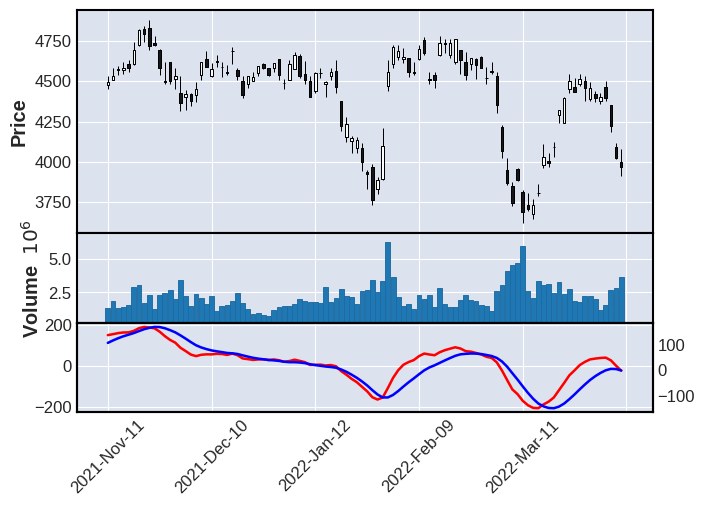

In [8]:
import mplfinance as mpf
mdf = df.tail(100)  # 直近100日分のデータ
apd  = [
    mpf.make_addplot(mdf['macd'], panel=2, color='red'), # パネルの2番地に赤で描画
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'), 
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)